In [ ]:
# Step 1: Install Required Libraries
!pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Step 2: Import Necessary Libraries
from roboflow import Roboflow
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
rf = Roboflow(api_key="U8vh71GYTWhnA8RzlAWA")
project = rf.workspace("roboflow-100").project("csgo-videogame")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CSGO-videogame-2 in yolov8:: 100%|██████████| 4866/4866 [00:00<00:00, 5242.33it/s]


In [ ]:
# Step 4: Verify Dataset Path
# Roboflow typically downloads datasets to a specific directory
# The exact path might look like: /content/csgo-videogame-2/
print(f"Dataset downloaded to: {dataset.location}")

Dataset downloaded to: /content/CSGO-videogame-2


In [ ]:
# Step 5: Configure Training Parameters
model = YOLO('yolov8n.pt')  # Start with a pre-trained nano model
results = model.train(
    data=f'{dataset.location}/data.yaml',  # Path to dataset configuration
    epochs=50,             # Number of training epochs
    imgsz=640,              # Image size
    batch=16,               # Batch size
    device=0,               # GPU training (assumes CUDA is available)
    save=True,              # Save model after training
    project='csgo_detection', # Project save directory
    name='trained_model'    # Specific run name
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 374MB/s]

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/CSGO-videogame-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=csgo_detection, name=trained_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, o

100%|██████████| 755k/755k [00:00<00:00, 99.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 357MB/s]


AMP: checks passed ✅


train: Scanning /content/CSGO-videogame-2/train/labels... 1774 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1774/1774 [00:00<00:00, 2287.10it/s]


train: New cache created: /content/CSGO-videogame-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/CSGO-videogame-2/valid/labels... 446 images, 2 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<00:00, 1182.06it/s]

val: New cache created: /content/CSGO-videogame-2/valid/labels.cache


Plotting labels to csgo_detection/trained_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to csgo_detection/trained_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.21G      1.615      2.672      1.304         37        640: 100%|██████████| 111/111 [00:36<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]

                   all        446        564      0.782      0.635       0.71      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.24G      1.611       1.85      1.343         30        640: 100%|██████████| 111/111 [00:33<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]

                   all        446        564      0.575      0.516       0.54      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G      1.604      1.549      1.348         22        640: 100%|██████████| 111/111 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]

                   all        446        564       0.77      0.676      0.771      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G      1.615      1.379      1.366         29        640: 100%|██████████| 111/111 [00:32<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]

                   all        446        564       0.76      0.715      0.777      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G      1.581      1.254      1.349         26        640: 100%|██████████| 111/111 [00:32<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]

                   all        446        564      0.769      0.696      0.777      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G      1.562      1.181      1.339         26        640: 100%|██████████| 111/111 [00:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]

                   all        446        564      0.853      0.759      0.832      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G      1.533      1.095       1.32         18        640: 100%|██████████| 111/111 [00:32<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        446        564      0.872      0.787      0.869      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      1.507      1.059      1.298         33        640: 100%|██████████| 111/111 [00:32<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]

                   all        446        564      0.893      0.753      0.846      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.15G      1.471      1.016      1.293         22        640: 100%|██████████| 111/111 [00:33<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]

                   all        446        564       0.82      0.719      0.827      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.15G      1.487      1.017      1.297         30        640: 100%|██████████| 111/111 [00:32<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.86it/s]

                   all        446        564      0.865      0.753      0.853      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.22G      1.447     0.9745      1.269         28        640: 100%|██████████| 111/111 [00:33<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.66it/s]

                   all        446        564      0.856      0.819      0.868      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G      1.471     0.9707      1.289         22        640: 100%|██████████| 111/111 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]

                   all        446        564      0.892       0.83      0.898      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.18G      1.431     0.9226       1.27         24        640: 100%|██████████| 111/111 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]

                   all        446        564      0.891       0.85      0.905      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.13G      1.412     0.9104      1.252         29        640: 100%|██████████| 111/111 [00:33<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.81it/s]

                   all        446        564       0.94       0.83      0.912      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.24G      1.397     0.8903      1.257         22        640: 100%|██████████| 111/111 [00:32<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]

                   all        446        564      0.917      0.839      0.905      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G      1.402     0.8847      1.254         38        640: 100%|██████████| 111/111 [00:32<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]

                   all        446        564      0.915      0.865      0.918      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.14G      1.382     0.8427      1.225         29        640: 100%|██████████| 111/111 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]

                   all        446        564      0.937      0.864       0.92      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.13G      1.383      0.855      1.239         32        640: 100%|██████████| 111/111 [00:34<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        446        564      0.907      0.881      0.924       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.24G      1.346     0.8348      1.219         31        640: 100%|██████████| 111/111 [00:33<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]

                   all        446        564      0.908        0.9      0.936      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G      1.353     0.8425       1.22         32        640: 100%|██████████| 111/111 [00:33<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]

                   all        446        564      0.921       0.85      0.913       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.15G      1.322     0.8016      1.191         23        640: 100%|██████████| 111/111 [00:33<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        446        564      0.898      0.882      0.919      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.13G      1.339     0.8145      1.207         20        640: 100%|██████████| 111/111 [00:33<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]

                   all        446        564      0.929      0.886      0.928      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.22G      1.319     0.7887      1.195         26        640: 100%|██████████| 111/111 [00:34<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]

                   all        446        564       0.91      0.877       0.92       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G        1.3      0.776      1.194         21        640: 100%|██████████| 111/111 [00:32<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        446        564      0.923      0.899      0.933       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.14G      1.288     0.7429      1.173         21        640: 100%|██████████| 111/111 [00:33<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]

                   all        446        564       0.94      0.897      0.937      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.15G       1.28     0.7607      1.192         29        640: 100%|██████████| 111/111 [00:33<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]

                   all        446        564      0.931      0.889      0.938      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.24G       1.28     0.7466      1.174         36        640: 100%|██████████| 111/111 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]

                   all        446        564      0.941      0.877      0.928      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.16G      1.281     0.7643      1.176         25        640: 100%|██████████| 111/111 [00:33<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]

                   all        446        564      0.945      0.895      0.936      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.15G      1.269     0.7337      1.167         27        640: 100%|██████████| 111/111 [00:33<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]

                   all        446        564      0.951      0.908      0.941      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.13G      1.251     0.7179      1.164         26        640: 100%|██████████| 111/111 [00:34<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]

                   all        446        564      0.926      0.904      0.938      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.24G      1.266     0.7178      1.164         27        640: 100%|██████████| 111/111 [00:33<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]

                   all        446        564      0.952      0.901      0.944      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.14G       1.22     0.6854      1.145         19        640: 100%|██████████| 111/111 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]

                   all        446        564      0.937      0.913      0.948      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.14G      1.231     0.6895       1.15         24        640: 100%|██████████| 111/111 [00:33<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]

                   all        446        564      0.937      0.918       0.95      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.15G      1.214     0.6851      1.144         18        640: 100%|██████████| 111/111 [00:33<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]

                   all        446        564      0.937      0.907      0.945      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.24G      1.215     0.6832      1.153         31        640: 100%|██████████| 111/111 [00:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]

                   all        446        564      0.956       0.93      0.958       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.16G      1.203     0.6781      1.131         25        640: 100%|██████████| 111/111 [00:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.43it/s]

                   all        446        564      0.954      0.925      0.955      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.15G       1.18     0.6532      1.122         22        640: 100%|██████████| 111/111 [00:33<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.69it/s]

                   all        446        564      0.958       0.92      0.951      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.13G      1.183     0.6467      1.124         29        640: 100%|██████████| 111/111 [00:33<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.73it/s]

                   all        446        564      0.934      0.937      0.957      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.22G      1.149     0.6343      1.112         29        640: 100%|██████████| 111/111 [00:32<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        446        564      0.945      0.926      0.952      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G      1.172     0.6293      1.106         29        640: 100%|██████████| 111/111 [00:32<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.68it/s]

                   all        446        564      0.944      0.925       0.96       0.63


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.14G      1.099     0.5146       1.06         18        640: 100%|██████████| 111/111 [00:34<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]

                   all        446        564      0.965      0.908      0.957      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G      1.071     0.5033      1.054         19        640: 100%|██████████| 111/111 [00:33<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]

                   all        446        564      0.953      0.924      0.955      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.22G       1.07     0.5038      1.057         16        640: 100%|██████████| 111/111 [00:30<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        446        564      0.959      0.918      0.953      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.14G      1.034     0.4893      1.041         17        640: 100%|██████████| 111/111 [00:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]

                   all        446        564      0.953      0.932      0.959      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.14G      1.031     0.4807      1.037         16        640: 100%|██████████| 111/111 [00:32<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]

                   all        446        564      0.946      0.936       0.96      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.13G      1.012     0.4765      1.032         18        640: 100%|██████████| 111/111 [00:32<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]

                   all        446        564      0.952      0.931       0.96      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.22G      1.004     0.4748      1.026         18        640: 100%|██████████| 111/111 [00:32<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]

                   all        446        564       0.96      0.923      0.964      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.14G     0.9919     0.4677      1.019         17        640: 100%|██████████| 111/111 [00:31<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.31it/s]

                   all        446        564      0.959      0.929      0.959      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.14G     0.9633     0.4567      1.002         16        640: 100%|██████████| 111/111 [00:30<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]

                   all        446        564      0.955      0.928       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G     0.9665     0.4555      1.012         21        640: 100%|██████████| 111/111 [00:33<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:03<00:00,  3.78it/s]

                   all        446        564      0.953      0.932      0.958      0.661



50 epochs completed in 0.537 hours.
Optimizer stripped from csgo_detection/trained_model/weights/last.pt, 6.2MB
Optimizer stripped from csgo_detection/trained_model/weights/best.pt, 6.2MB

Validating csgo_detection/trained_model/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.47it/s]


                   all        446        564      0.953      0.933      0.958       0.66
                    CT        231        286      0.943      0.926      0.962      0.652
                     T        240        278      0.962      0.939      0.955      0.669
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to csgo_detection/trained_model


In [ ]:
# Step 6: Validate the Trained Model
results = model.val()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/CSGO-videogame-2/valid/labels.cache... 446 images, 2 backgrounds, 0 corrupt: 100%|██████████| 446/446 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:06<00:00,  4.26it/s]


                   all        446        564      0.953      0.933      0.958      0.659
                    CT        231        286      0.943      0.926      0.962      0.652
                     T        240        278      0.962      0.939      0.955      0.667
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to csgo_detection/trained_model2


In [ ]:
# Optional: Print out the path to the saved model
best_model_path = f"{model.trainer.save_dir}/weights/best.pt"
print(f"Best model saved at: {best_model_path}")

Best model saved at: csgo_detection/trained_model/weights/best.pt


In [36]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the trained model
model = YOLO(best_model_path)  # Replace with your trained model path

def predict_image(image_path):
    """
    Predict objects in a single image and visualize results in Colab
    with different colored bounding boxes for different classes

    Args:
        image_path (str): Path to the input image
    """
    # Run prediction
    results = model.predict(source=image_path, conf=0.15, iou=0.5)

    # Read the image for visualization
    img = cv2.imread(image_path)

    # Color palette for different classes
    # You can customize these colors as needed
    colors = {
        'T': (0, 0, 255),      # Red for Counter-Terrorists
        'CT': (0, 255, 0)         # Green for Terrorists
    }

    # Process each detected object
    for result in results:
        # Extract bounding boxes, confidence, and class information
        boxes = result.boxes

        for box in boxes:
            # Extract coordinates
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Get confidence and class
            conf = box.conf[0]
            cls = box.cls[0]

            # Get class name
            class_name = model.names[int(cls)]

            # Choose color based on class name
            # Default to green if class not in predefined colors
            box_color = colors.get(class_name, (0, 255, 0))

            # Draw bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 2)

            # Create label with class and confidence
            label = f'{class_name}: {conf:.2f}'

            # Put text on image
            cv2.putText(img, label, (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, box_color, 2)

    # Display image using Colab-specific method
    cv2_imshow(img)


image 1/1 /content/csgo11.jpg: 640x640 2 CTs, 1 T, 8.7ms
Speed: 3.4ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


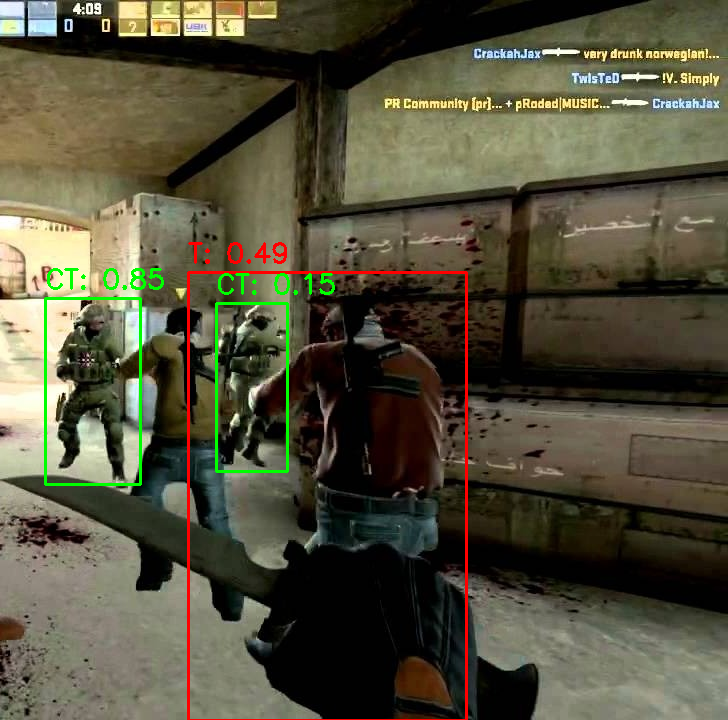

In [37]:
# Example usage in Colab
predict_image('csgo11.jpg')  # Display prediction

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the trained model
model = YOLO(best_model_path)  # Replace with your trained model path

def predict_video(video_path, output_path='/content/predicted_video.mp4', display_frames=False):
    """
    Predict objects in a video and save annotated video

    Args:
        video_path (str): Path to input video
        output_path (str): Path to save annotated video
        display_frames (bool): Whether to display frames in Colab (can slow down processing)
    """
    # Open the video
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Progress tracking
    processed_frames = 0

    while cap.isOpened():
        # Read a frame
        ret, frame = cap.read()
        if not ret:
            break

        # Run prediction on the frame
        results = model(frame)

        # Process each detected object
        for result in results:
            boxes = result.boxes

            for box in boxes:
                # Extract coordinates
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # Get confidence and class
                conf = box.conf[0]
                cls = box.cls[0]

                # Get class name
                class_name = model.names[int(cls)]

                # Draw bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Create label with class and confidence
                label = f'{class_name}: {conf:.2f}'

                # Put text on frame
                cv2.putText(frame, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Write the frame
        out.write(frame)

        # Optional frame display (can be resource-intensive)
        if display_frames:
            cv2_imshow(frame)

        # Update progress
        processed_frames += 1
        print(f"Processing: {processed_frames}/{total_frames} frames", end='\r')

    # Release resources
    cap.release()
    out.release()

    print(f"\nVideo processing complete. Saved to {output_path}")
    return output_path

# Additional utility function for preview
def preview_video(video_path, num_frames=5):
    """
    Preview first few frames of video predictions

    Args:
        video_path (str): Path to input video
        num_frames (int): Number of frames to display
    """
    cap = cv2.VideoCapture(video_path)

    for i in range(num_frames):
        ret, frame = cap.read()
        if not ret:
            break

        # Run prediction
        results = model(frame)

        for result in results:
            boxes = result.boxes

            for box in boxes:
                x1, y1, x2, y2 = box.xyxy[0]
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                conf = box.conf[0]
                cls = box.cls[0]
                class_name = model.names[int(cls)]

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                label = f'{class_name}: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display frame
        cv2_imshow(frame)

    cap.release()

In [ ]:
# Example usage
# Predict full video
predict_video('csgo3.mp4')


0: 640x384 (no detections), 37.1ms
Speed: 1.5ms preprocess, 37.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)
Processing: 1/626 frames
0: 640x384 (no detections), 6.4ms
Speed: 1.9ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 2/626 frames
0: 640x384 (no detections), 6.1ms
Speed: 2.1ms preprocess, 6.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 3/626 frames
0: 640x384 (no detections), 6.2ms
Speed: 2.2ms preprocess, 6.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 4/626 frames
0: 640x384 (no detections), 6.3ms
Speed: 1.7ms preprocess, 6.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 5/626 frames
0: 640x384 (no detections), 6.4ms
Speed: 2.6ms preprocess, 6.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
Processing: 6/626 frames
0: 640x384 (no detections), 6.2ms
Speed: 1.5ms preprocess, 6.2ms in

'/content/predicted_video.mp4'

In [ ]:
# Preview first few frames
preview_video('csgo.mp4')


image 1/1 /content/csgo4.png: 640x640 1 CT, 1 T, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


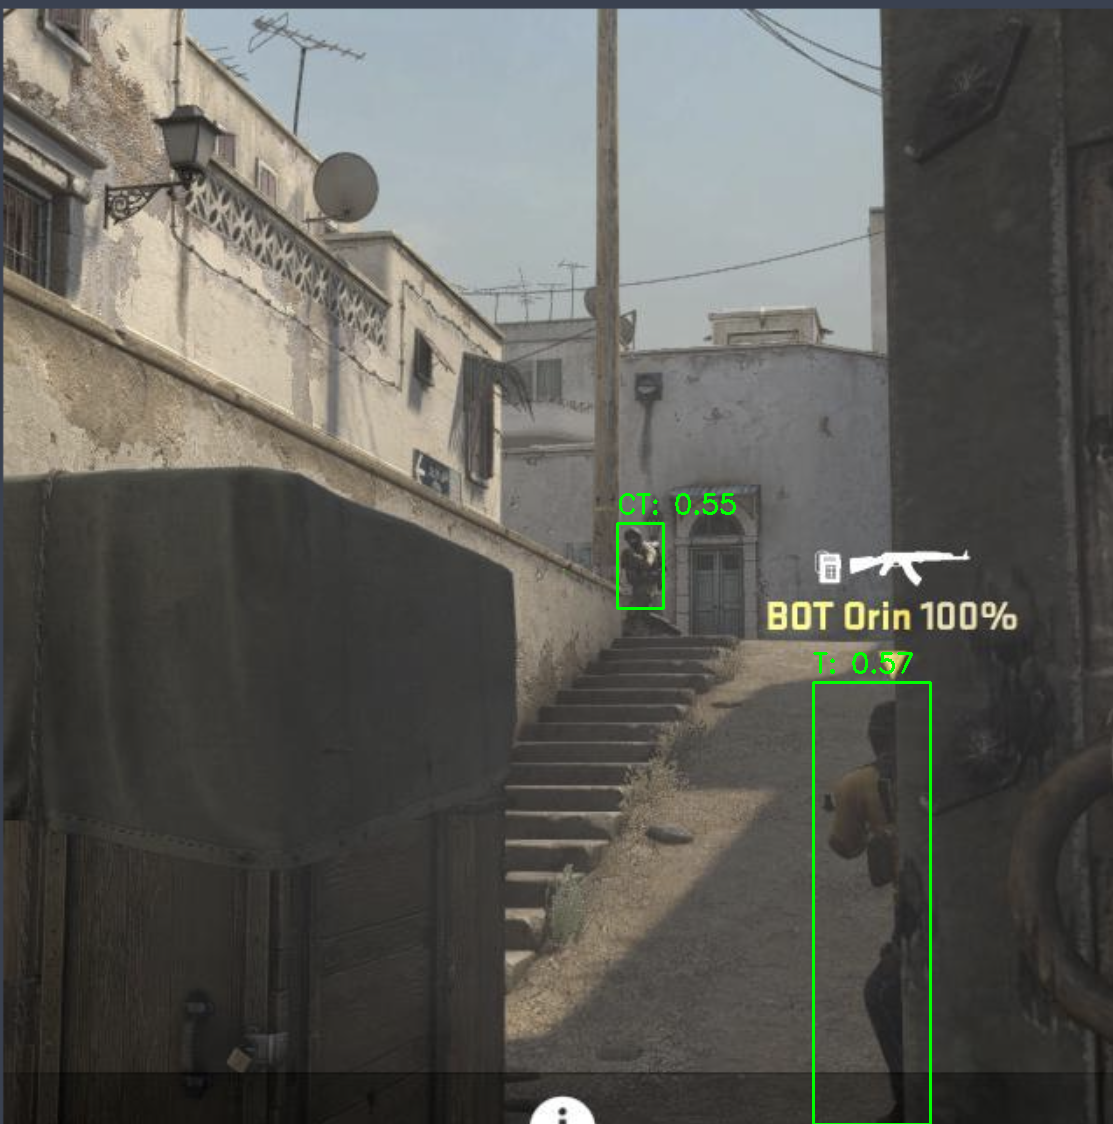

In [ ]:
predict_image('csgo4.png')